## Qubit Lifetimes

In [121]:
import itertools

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.ticker import MaxNLocator
from adjustText import adjust_text

plt.style.use('science')

print([val for val in itertools.product(markers.items(), ['T_1', 'T_2'])])

[(('Cooper-pair box', 'o'), 'T_1'), (('Cooper-pair box', 'o'), 'T_2'), (('Flux qubit', '^'), 'T_1'), (('Flux qubit', '^'), 'T_2'), (('Transmon', 's'), 'T_1'), (('Transmon', 's'), 'T_2')]


In [122]:
data = {
    'Cooper-pair box': [
        {'year': 1999, 'T1': 10**-2.6},
        {'year': 2001, 'T1': 10**-2, 'T2': 10**-2.3}
    ],
    'Flux qubit': [
        {'year':  2003, 'T1': 1, 'T2': 10**-1.8},
        {'year':  2005, 'T1': 10**0.6, 'T2': 10**0.5},
        {'year':  2010, 'T1': 10**1.1, 'T2': 10**1.2},
        {'year':  2015, 'T1': 10**1.1, 'T2': 10**2}
    ],
    'Transmon': [
        {'year': 2008, 'T1': 10**0.58, 'T2': 10**0.45},
        {'year': 2013, 'T1': 10**1.5, 'T2': 10**1.6},
        {'year': 2020, 'T1': 200, 'T2': 250},
    ],
}

markers = {
    'Cooper-pair box': 'o',
    'Flux qubit': '^',
    'Transmon': 's',
}

colours = {'T_1': 'r', 'T_2': 'b'}

handles = [mlines.Line2D([], [], color=colours[T], marker=val, linestyle='None', markersize=8, label=f'{key} ${T}$ time') for (key, val), T in itertools.product(markers.items(), ['T_1', 'T_2'])]

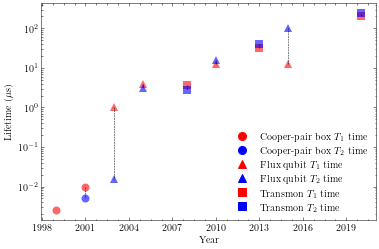

In [124]:
fig, ax = plt.subplots(figsize=(6,4))

texts = []

for qubit_name, qubit_datas in data.items():
    
    for qubit_data in qubit_datas:
        if 'T1' in qubit_data.keys():
            plt.plot(qubit_data['year'], qubit_data['T1'], 'r', marker=markers[qubit_name], markersize=8, alpha=0.6, markeredgewidth=0.0)
        if 'T2' in qubit_data.keys():
            plt.plot(qubit_data['year'], qubit_data['T2'], 'b', marker=markers[qubit_name], markersize=8, alpha=0.6, markeredgewidth=0.0)
            plt.plot([qubit_data['year'], qubit_data['year']], [qubit_data['T1'], qubit_data['T2']], 'k--', linewidth=0.5)
        
ax.set_yscale('log')
ax.set_ylabel('Lifetime ($\mu$s)')
ax.set_xlabel('Year')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.legend(handles=handles)
plt.savefig('../figures/General/lifetimes.png', dpi=300)